# SET UP

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Lade nötiges Paket: tidyverse


# Load the Data

In [98]:
%%R


df <- read_csv('cleaned_output.csv')

Rows: 11980 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): University, Department, Academic Year, Field, School
dbl (2): Overall Pay, LW Ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [99]:
%%R

df

# A tibble: 11,980 × 7
   University   Department `Overall Pay` `LW Ratio` `Academic Year` Field School
   <chr>        <chr>              <dbl>      <dbl> <chr>           <chr> <chr> 
 1 lawrence te… architect…         20000      NA    2025-2026       Huma… <NA>  
 2 Boston Univ… Bioinform…         46350       1.62 2025-2026       STEM  <NA>  
 3 North Carol… Industria…         21250      NA    2023-2024       STEM  <NA>  
 4 North Carol… Industria…         17000      NA    2022-2023       STEM  <NA>  
 5 Brown Unive… Mathemati…         52000       2.29 2025-2026       STEM  Ivy   
 6 University … City and …         20600       0.93 2025-2026       Soci… <NA>  
 7 Northwester… Communica…         45000       1.85 2024-2025       Soci… <NA>  
 8 Princeton U… Politics           49920       1.96 2024-2025       Soci… Ivy   
 9 University … Chemistry          47000       1.69 2025-2026       STEM  <NA>  
10 Georgia Ins… Chemistry          35408       1.52 2025-2026       STEM  <NA>  
# ℹ 1

# Exploratory Analysis: summary statistics

In [100]:
%%R
# filter out nonsense data

df <- df %>% filter(`Overall Pay` >= 15000, `Overall Pay` <= 90000)

## getting a statistical summary for each Field of Study

In [101]:
%%R

df %>%
    group_by(Field) %>%
    summarise(
        count = n(),
        mean = mean(`Overall Pay`, na.rm = TRUE),
        sd = sd(`Overall Pay`, na.rm = TRUE),
        min = min(`Overall Pay`, na.rm = TRUE),
        q1 = quantile(`Overall Pay`, 0.25, na.rm = TRUE),
        median = median(`Overall Pay`, na.rm = TRUE),
        q3 = quantile(`Overall Pay`, 0.75, na.rm = TRUE),
        max = max(`Overall Pay`, na.rm = TRUE)
    )


# A tibble: 4 × 9
  Field          count   mean    sd   min    q1 median    q3   max
  <chr>          <int>  <dbl> <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl>
1 Business         308 30857. 8848. 15000 24575  30000 36500 68000
2 Humanities      1453 25696. 8075. 15000 19650  24000 30500 85000
3 STEM            7492 29343. 7587. 15000 24000  29000 33800 87467
4 Social Science  2727 26598. 8253. 15000 20200  25000 31000 90000


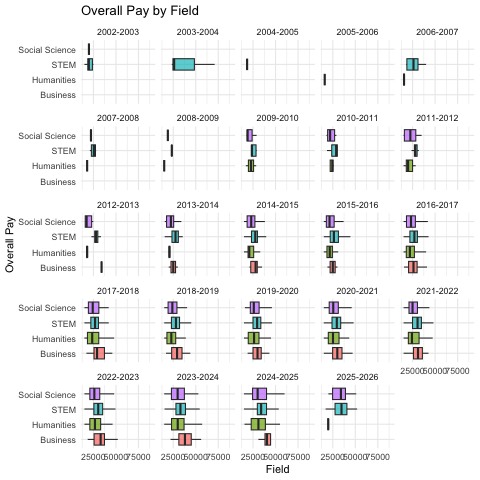

In [102]:
%%R

ggplot(df, aes(x = `Overall Pay`, y = Field, fill = Field)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) + 
  theme_minimal() +
  labs(title = "Overall Pay by Field",
       x = "Field", 
       y = "Overall Pay") +
    facet_wrap(~`Academic Year`) +
  theme(legend.position = "none")

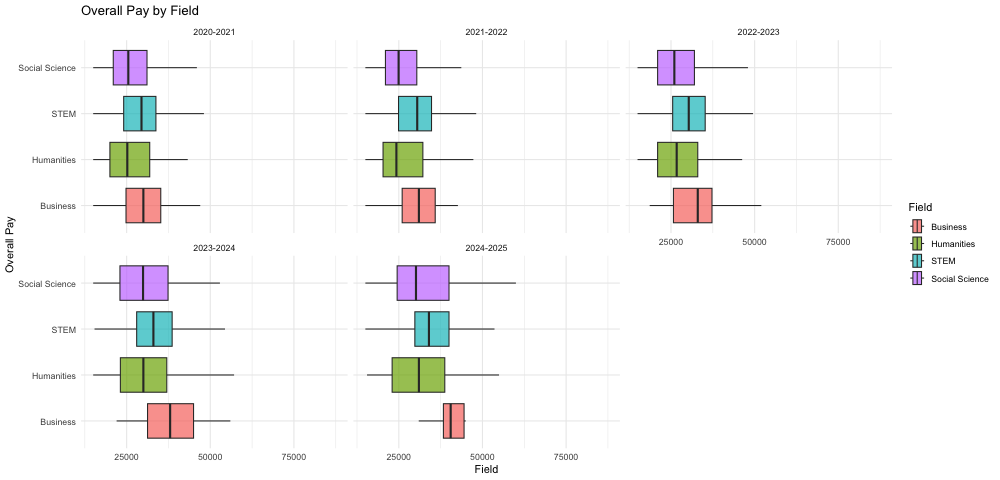

In [103]:
%%R -w 1000


df_filtered <- df[df$`Academic Year` %in% c("2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"), ]


df_filtered$`Academic Year` <- factor(df_filtered$`Academic Year`, 
                                      levels = c("2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"))


ggplot(df_filtered, aes(x = `Overall Pay`, y = Field, fill = Field)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) + 
  theme_minimal() +
  labs(title = "Overall Pay by Field",
       x = "Field", 
       y = "Overall Pay") +
  facet_wrap(~`Academic Year`) +
  theme_minimal()

In [107]:
%%R -w1000

# Adjust the 'Academic Year' factor to include years before 2020 (e.g., 2015-2016, 2016-2017, etc.)
df$`Academic Year` <- factor(df$`Academic Year`, 
                             levels = c("2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", 
                                        "2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"))

# Remove rows with NA in 'Academic Year' or 'Overall Pay'
library(dplyr)
df_median <- df %>%
  filter(!is.na(`Academic Year`) & !is.na(`Overall Pay`)) %>%  # Remove rows with NA in either 'Academic Year' or 'Overall Pay'
  group_by(`Academic Year`, Field) %>%
  summarise(median_pay = median(`Overall Pay`, na.rm = TRUE))


`summarise()` has grouped output by 'Academic Year'. You can override using the
`.groups` argument.


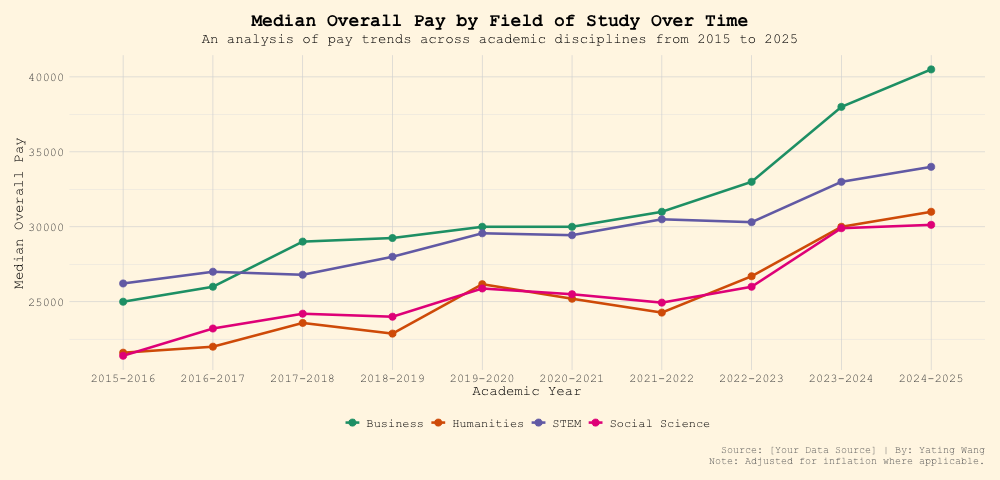

In [197]:
%%R -w 1000


ggplot(df_median, aes(x = `Academic Year`, y = median_pay, color = Field, group = Field)) +
  geom_line(size = 1.2) +  
  geom_point(size = 3) +  
  theme_minimal(base_family = "serif") +  
  labs(
    title = "Median Overall Pay by Field of Study Over Time",
    subtitle = "An analysis of pay trends across academic disciplines from 2015 to 2025",
    caption = "Source: [Your Data Source] | By: Yating Wang\nNote: Adjusted for inflation where applicable.",
    x = "Academic Year", 
    y = "Median Overall Pay"
  ) +
  theme(
    text = element_text(family = "Courier New"),  
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),  
    plot.subtitle = element_text(size = 14, hjust = 0.5, margin = margin(b = 10)),  
    axis.title.x = element_text(size = 14),  
    axis.title.y = element_text(size = 14),
    axis.text = element_text(size = 12),  
    legend.title = element_blank(),  
    legend.text = element_text(size = 12),  
    legend.position = "bottom",  
    plot.caption = element_text(size = 10, color = "grey40", margin = margin(t = 10)),  
    plot.margin = margin(15, 15, 15, 15),  
    plot.background = element_rect(fill = "#FFF7E6", color = NA), 
    panel.background = element_rect(fill = "#FFF7E6", color = NA), 
    panel.grid.major = element_line(color = "grey85", size = 0.3),  
    panel.grid.minor = element_line(color = "grey90", size = 0.2),  
    plot.title.position = "plot"  # Align title nicely
  ) +
  scale_x_discrete(limits = c("2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", 
                              "2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025")) +
  scale_color_brewer(palette = "Dark2") 


# chart to compare student loan in different majors

In [167]:
%%R

loan <- read_csv('edu_debt.csv')

loan

Rows: 16 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Major
dbl (1): percent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 16 × 2
   Major                                         percent
   <chr>                                           <dbl>
 1 Agricultural sciences and natural resources      0.27
 2 Biological and biomedical sciences               0.2 
 3 Computer and information sciences                0.15
 4 Engineering                                      0.17
 5 Geosciences, atmospheric, and ocean sciences     0.18
 6 Health sciences                                  0.45
 7 Mathematics and statistics                       0.11
 8 Multidisciplinary/ interdisciplinary sciences    0.2 
 9 Physical sciences                                0.14
10 Psychology                                      

In [177]:
%%R

install.packages("extrafont")


Die heruntergeladenen Binärpakete sind in 
	/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T//Rtmpu8DVbf/downloaded_packages


versuche URL 'https://www.stats.bris.ac.uk/R/bin/macosx/big-sur-arm64/contrib/4.4/extrafont_0.19.tgz'
Content type 'application/x-gzip' length 55628 bytes (54 KB)
downloaded 54 KB



In [179]:
%%R

library(extrafont)

In [180]:
%%R

font_import()

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


sh: line 1:  5401 Abort trap: 6           '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/System/Library/Fonts/Supplemental/Chalkduster.ttf' '/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T//Rtmpu8DVbf/fonts/Chalkduster' 2>&1
sh: line 1:  5404 Abort trap: 6           '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/System/Library/Fonts/Supplemental/Chalkduster.ttf' '/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T//Rtmpu8DVbf/fonts/Chalkduster' 2>&1
sh: line 1:  5490 Abort trap: 6           '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/System/Library/Fonts/Supplemental/Kokonor.ttf' '/var/folders/zz/2b8md6f924779tdhfsf8zvqm0000gn/T//Rtmpu8DVbf/fonts/Kokonor' 2>&1
sh: line 1:  5492 Abort trap: 6           '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/System/Li

Scanning ttf files in /Library/Fonts/, /System/Library/Fonts, /System/Library/Fonts/Supplemental, ~/Library/Fonts/ ...
Extracting .afm files from .ttf files...
/System/Library/Fonts/Supplemental/Arial Unicode.ttf => /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/extrafontdb/metrics/Arial Unicode
/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf => /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/extrafontdb/metrics/Apple Braille Outline 6 Dot
/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf => /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/extrafontdb/metrics/Apple Braille Outline 8 Dot
/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf => /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/extrafontdb/metrics/Apple Braille Pinpoint 6 Dot
/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf => /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/extrafontdb/metrics/Apple Brai

In [181]:
%%R

loadfonts(device = "pdf")

Registering font with R using pdfFont(): .Keyboard
Registering font with R using pdfFont(): .New York
Registering font with R using pdfFont(): .SF Arabic
Registering font with R using pdfFont(): .SF Compact
Registering font with R using pdfFont(): .SF Compact Rounded
Registering font with R using pdfFont(): .SF NS Mono
Registering font with R using pdfFont(): .SF NS Rounded
Registering font with R using pdfFont(): Academy Engraved LET
Registering font with R using pdfFont(): Andale Mono
More than one version of regular/bold/italic found for Apple Braille. Skipping setup for this font.
Registering font with R using pdfFont(): AppleMyungjo
Registering font with R using pdfFont(): Arial
Registering font with R using pdfFont(): Arial Black
Registering font with R using pdfFont(): Arial Narrow
Registering font with R using pdfFont(): Arial Rounded MT Bold
Registering font with R using pdfFont(): Arial Unicode MS
Registering font with R using pdfFont(): Bodoni 72 Smallcaps
Registering font w

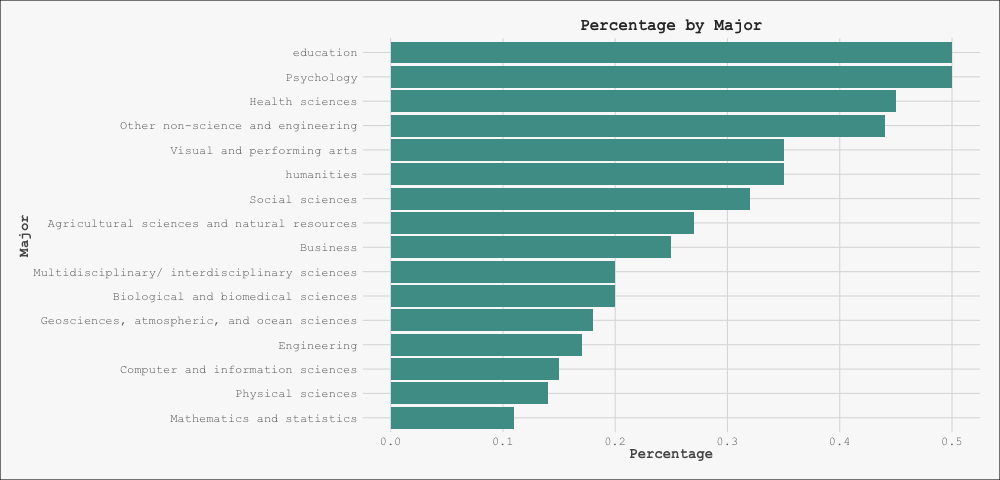

In [192]:
%%R -w 1000

ggplot(loan, aes(x = percent, y = Major)) + 
  geom_bar(stat = "identity", fill = "#4C9C96") + 
  labs(title = "Percentage by Major", 
       x = "Percentage", 
       y = "Major") + 
  theme_minimal() + 
  theme(
    text = element_text(family = "Courier New"),  
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", color = "#333333"), 
    axis.title = element_text(size = 14, face = "bold", color = "#555555"), 
    axis.text.x = element_text(size = 12, color = "#666666"),
    axis.text.y = element_text(size = 12, color = "#666666"),
    panel.grid.major = element_line(color = "#DDDDDD"), 
    panel.grid.minor = element_blank(), 
    plot.background = element_rect(fill = "#F9F9F9"),
    plot.margin = margin(20, 20, 20, 20))


# A treemap to show how many people are enrolled in what field of study

In [114]:
%%R

library(treemapify)

In [130]:
%%R

data <- read.csv("treemap.csv")

In [145]:
%%R

str(data)


'data.frame':	65 obs. of  4 variables:
 $ Field : chr  "hard-core Science" "hard-core Science" "hard-core Science" "hard-core Science" ...
 $ Majors: chr  "Agricultural sciences" "Agricultural sciences" "Biological sciences" "Biological sciences" ...
 $ Track : chr  "Agricultural, animal, plant, and veterinary sciences" "Natural resources and conservation" "Biochemistry, biophysics, and molecular biology" "Bioinformatics, biostatistics, and computational biology" ...
 $ Count : num  856 422 NA 735 761 NA 477 NA NA 409 ...


In [157]:
%%R

reshaped_data <- data %>%
  group_by(Field, Majors) %>%
  summarise(Total_Count = sum(Count, na.rm = TRUE), .groups = "drop")

# View the reshaped data
head(reshaped_data)


# A tibble: 6 × 3
  Field             Majors                  Total_Count
  <chr>             <chr>                         <dbl>
1 Non-science       "Arts"                          824
2 Non-science       "Business"                      493
3 Non-science       "Humanities"                   2319
4 Non-science       "Other non-science"            1015
5 Non-science       "education "                    458
6 hard-core Science "Agricultural sciences"        1278


In [158]:
%%R

treemap(reshaped_data, 
        index = c("Field", "Majors"),  # Hierarchical grouping: Field > Majors
        vSize = "Total_Count",         # Size of each box based on Total_Count
        type = "index"                 # Color based on Field and Majors
)

Fehler in treemap(reshaped_data, index = c("Field", "Majors"), vSize = "Total_Count",  : 
  konnte Funktion "treemap" nicht finden


RInterpreterError: Failed to parse and evaluate line '\ntreemap(reshaped_data, \n        index = c("Field", "Majors"),  # Hierarchical grouping: Field > Majors\n        vSize = "Total_Count",         # Size of each box based on Total_Count\n        type = "index"                 # Color based on Field and Majors\n)\n'.
R error message: 'Fehler in treemap(reshaped_data, index = c("Field", "Majors"), vSize = "Total_Count",  : \n  konnte Funktion "treemap" nicht finden'

In [148]:
%%R

# Summing the Count by major
major_summary <- data %>%
  group_by(Majors) %>%
  summarise(Total_Count = sum(Count, na.rm = TRUE))

major_summary

# A tibble: 16 × 2
   Majors                  Total_Count
   <chr>                         <dbl>
 1 "Agricultural sciences"        1278
 2 "Arts"                          824
 3 "Biological sciences"          3872
 4 "Business"                      493
 5 "Computer sciences"             692
 6 "Geosciences"                  1216
 7 "Health science"               2746
 8 "Humanities"                   2319
 9 "Mathematics"                  2056
10 "Other non-science"            1015
11 "Physical sciences"             712
12 "Psychology"                   1297
13 "Social sciences"              2530
14 "education "                    458
15 "engineering"                  3216
16 "multidisciplinary"             583


In [153]:
%%R

major_summary_with_field <- major_summary %>%
  left_join(data %>% select(Majors, Field) %>% distinct(), by = "Majors")

head(major_summary_with_field)

# A tibble: 6 × 3
  Majors                Total_Count Field            
  <chr>                       <dbl> <chr>            
1 Agricultural sciences        1278 hard-core Science
2 Arts                          824 Non-science      
3 Biological sciences          3872 hard-core Science
4 Business                      493 Non-science      
5 Computer sciences             692 hard-core Science
6 Geosciences                  1216 hard-core Science


In [149]:
%%R

# Summing the Count by Field
field_summary <- data %>%
  group_by(Field) %>%
  summarise(Total_Count = sum(Count, na.rm = TRUE))

field_summary

# A tibble: 3 × 2
  Field             Total_Count
  <chr>                   <dbl>
1 Non-science              5109
2 hard-core Science       16371
3 social science           3827


In [154]:
%%R

combined_data <- major_summary_with_field %>%
  left_join(field_summary, by = "Field")

head(combined_data)

# A tibble: 6 × 4
  Majors                Total_Count.x Field             Total_Count.y
  <chr>                         <dbl> <chr>                     <dbl>
1 Agricultural sciences          1278 hard-core Science         16371
2 Arts                            824 Non-science                5109
3 Biological sciences            3872 hard-core Science         16371
4 Business                        493 Non-science                5109
5 Computer sciences               692 hard-core Science         16371
6 Geosciences                    1216 hard-core Science         16371


In [155]:
%%R

treemap(combined_data, 
        index = c("Field", "Majors"),  # Hierarchy: Field > Majors
        vSize = "Total_Count.x",        
        vColor = "Total_Count.y",   
        draw = TRUE)

Fehler in treemap(combined_data, index = c("Field", "Majors"), vSize = "Total_Count.x",  : 
  konnte Funktion "treemap" nicht finden


RInterpreterError: Failed to parse and evaluate line '\ntreemap(combined_data, \n        index = c("Field", "Majors"),  # Hierarchy: Field > Majors\n        vSize = "Total_Count.x",        # Area size based on Major counts\n        vColor = "Total_Count.y",       # Color based on Field counts\n        draw = TRUE)\n'.
R error message: 'Fehler in treemap(combined_data, index = c("Field", "Majors"), vSize = "Total_Count.x",  : \n  konnte Funktion "treemap" nicht finden'